<a href="https://colab.research.google.com/github/ritikakumar0204/MNIST-Fashion--Multi-Class-Classification/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# imports
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random
import itertools
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model
import numpy as np

In [3]:
# load the data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# EDA
print(f"Training sample: \n {train_data[0]}")
print(f"Training label: \n {train_labels[0]}")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [5]:
# check shape
len(train_data)

60000

In [6]:
# check the shape
train_data[0].shape, train_labels[0].shape

((28, 28), ())

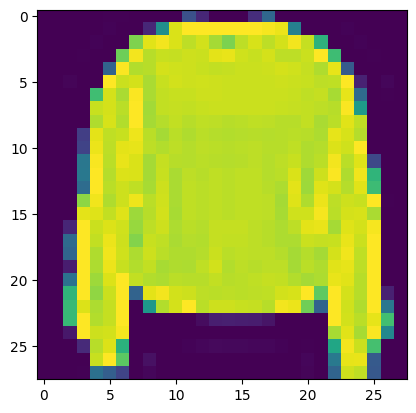

In [7]:
# plotting sample
plt.imshow(train_data[7]);

In [8]:
# check out samples label
print(train_labels[7])

2


In [9]:
# create a dictionary for number labels to their respective cloth category
class_names = {0 : "T-shirt/top",
               1: "Trouser",
               2: "Pullover",
               3: "Dress",
               4: "Coat",
               5: "Sandal",
               6:"Shirt",
               7: "Sneaker",
               8: "Bag",
               9: "Ankle boot"}

In [10]:
num_of_class = len(class_names)
print("Number of classes = ", num_of_class)

Number of classes =  10


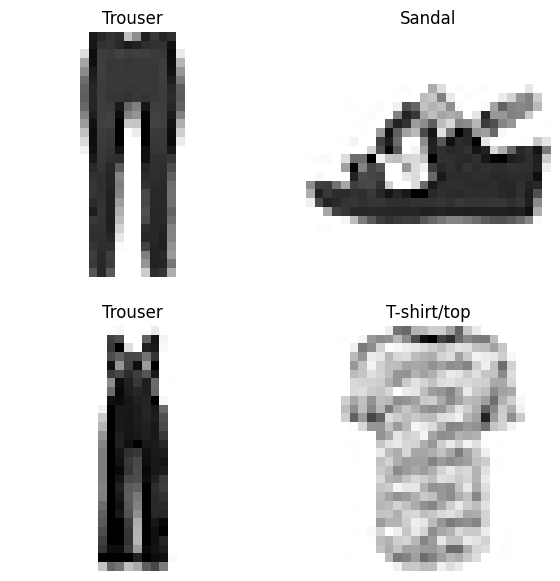

In [12]:
# plot a random example images and its label

plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## **Build multi class classification model**

Model 1:
* Input shape = 28 x 28
* Output shape = 10
* Loss Function = tf.keras.losses.CategoricalCrossentropy()
* Output layer activation = sigmoid()

### Non Normalised data

In [13]:
# set random seed

tf.random.set_seed(42)


# Create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile model

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

non_norm_history = model_1.fit(train_data,
            tf.one_hot(train_labels, depth=10),
            epochs=10,
            validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3715 - accuracy: 0.1226 - val_loss: 2.1964 - val_accuracy: 0.1452
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1059 - accuracy: 0.1678 - val_loss: 1.9426 - val_accuracy: 0.1898
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8001 - accuracy: 0.2209 - val_loss: 1.7383 - val_accuracy: 0.2260
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7281 - accuracy: 0.2456 - val_loss: 1.5918 - val_accuracy: 0.3329
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5401 - accuracy: 0.3378 - val_loss: 1.4587 - val_accuracy: 0.3876
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4496 - accuracy: 0.3810 - val_loss: 1.4324 - val_accuracy: 0.3476
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4216 - accuracy: 0.3885 - val_loss: 1.4052 - val_accuracy:

In [14]:
# Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# normalization of data

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

### Normalised data

In [17]:
# set random seed

tf.random.set_seed(42)


# Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile model

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model

norm_history = model_2.fit(train_data_norm,
            train_labels,
            epochs=10,
            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4216 - accuracy: 0.4525 - val_loss: 1.0103 - val_accuracy: 0.5954
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8442 - accuracy: 0.6805 - val_loss: 0.7340 - val_accuracy: 0.7286
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6772 - accuracy: 0.7537 - val_loss: 0.6735 - val_accuracy: 0.7484
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6159 - accuracy: 0.7846 - val_loss: 0.6332 - val_accuracy: 0.7784
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5776 - accuracy: 0.8015 - val_loss: 0.5969 - val_accuracy: 0.7978
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5529 - accuracy: 0.8089 - val_loss: 0.6202 - val_accuracy: 0.7781
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5435 - accuracy: 0.8111 - val_loss: 0.5936 - val_accuracy:

<Axes: title={'center': 'Normalised data'}>

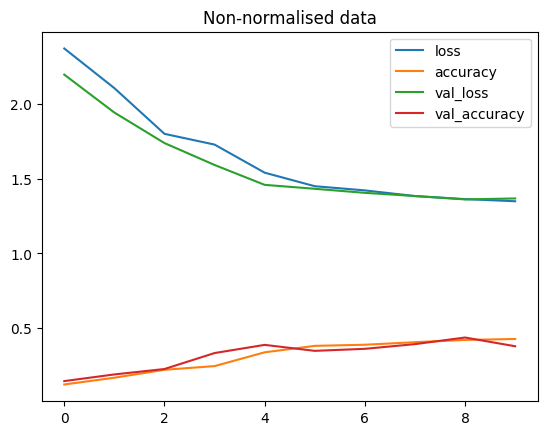

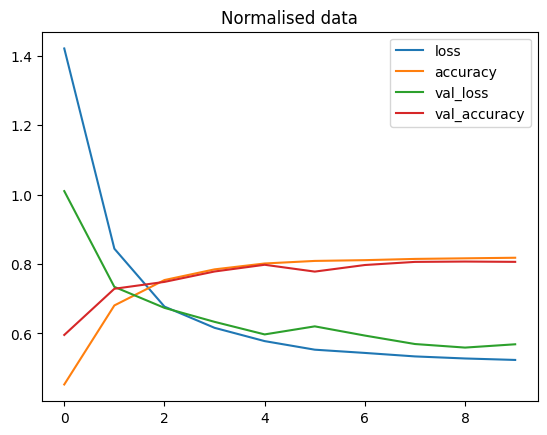

In [19]:
import pandas as pd

# plot non-normalised data

pd.DataFrame(non_norm_history.history).plot(title="Non-normalised data")
pd.DataFrame(norm_history.history).plot(title="Normalised data")



Find ideal learning rate

In [20]:
# set random seed

tf.random.set_seed(42)


# Create the model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile model

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# create learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model

history = model_3.fit(train_data_norm,
            train_labels,
            epochs=40,
            validation_data=(test_data_norm, test_labels),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3365 - accuracy: 0.4895 - val_loss: 1.0451 - val_accuracy: 0.5987 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9515 - accuracy: 0.6350 - val_loss: 0.9197 - val_accuracy: 0.6255 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8784 - accuracy: 0.6647 - val_loss: 0.9032 - val_accuracy: 0.6654 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8308 - accuracy: 0.7070 - val_loss: 0.8276 - val_accuracy: 0.7162 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8034 - accuracy: 0.7187 - val_loss: 0.8445 - val_accuracy: 0.7064 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7869 - accuracy: 0.7210 - val_loss: 0.8142 - val_accuracy: 0.7178 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6s

Text(0.5, 1.0, 'Ideal learning rate')

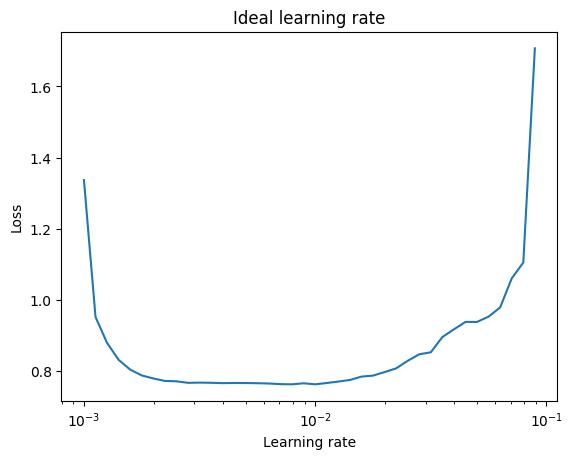

In [21]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Ideal learning rate")

Ideal learning rate is 0.001

Evaluate the model

In [22]:
# set random seed

tf.random.set_seed(42)


# Create the model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile model

model_4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model

history = model_4.fit(train_data_norm,
            train_labels,
            epochs=40,
            validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0935 - accuracy: 0.5558 - val_loss: 0.8432 - val_accuracy: 0.6396
Epoch 2/40
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7648 - accuracy: 0.6998 - val_loss: 0.7468 - val_accuracy: 0.7103
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6976 - accuracy: 0.7287 - val_loss: 0.7072 - val_accuracy: 0.7240
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6734 - accuracy: 0.7340 - val_loss: 0.6869 - val_accuracy: 0.7320
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6590 - accuracy: 0.7369 - val_loss: 0.6860 - val_accuracy: 0.7203
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6447 - accuracy: 0.7441 - val_loss: 0.6657 - val_accuracy: 0.7394
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6269 - accuracy: 0.7682 - val_loss: 0.6560 - val_accuracy

In [23]:
# create confision matrix

def make_cm(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """
  Creates confusion matrix
  """
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes.values()
  else:
    labels = np.arrange(cm.shape[0])

  ax.set(title="confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm[i,j]*100:.1f})",
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=text_size)

In [24]:
y_probs = model_4.predict(test_data_norm)

print(y_probs[0:5])

313/313 [==============================] - 1s 2ms/step
[[1.9517266e-11 1.4076472e-28 3.4165838e-15 5.1480367e-09 1.3022669e-11
  4.7455359e-01 6.0261542e-09 1.2664583e-01 1.5090458e-04 3.9864963e-01]
 [1.2548832e-03 2.5930737e-07 9.3602639e-01 3.1538039e-09 2.6784517e-02
  5.0192055e-28 3.5933368e-02 0.0000000e+00 5.4506313e-07 0.0000000e+00]
 [1.2684450e-05 9.9988967e-01 9.3982548e-05 2.8891320e-06 2.1009492e-07
  2.5304336e-15 4.8064294e-07 4.6265375e-27 1.6866133e-11 2.8769815e-27]
 [5.3219666e-04 9.9670237e-01 1.6755968e-03 9.9679350e-04 3.5158559e-05
  1.4520052e-09 5.7954065e-05 3.7965870e-16 2.7651524e-08 3.7634494e-17]
 [2.3176119e-01 1.3834630e-05 1.5858489e-01 1.3181608e-02 2.9628616e-02
  1.0873900e-09 5.6105763e-01 4.8307446e-28 5.7721371e-03 1.7195606e-27]]


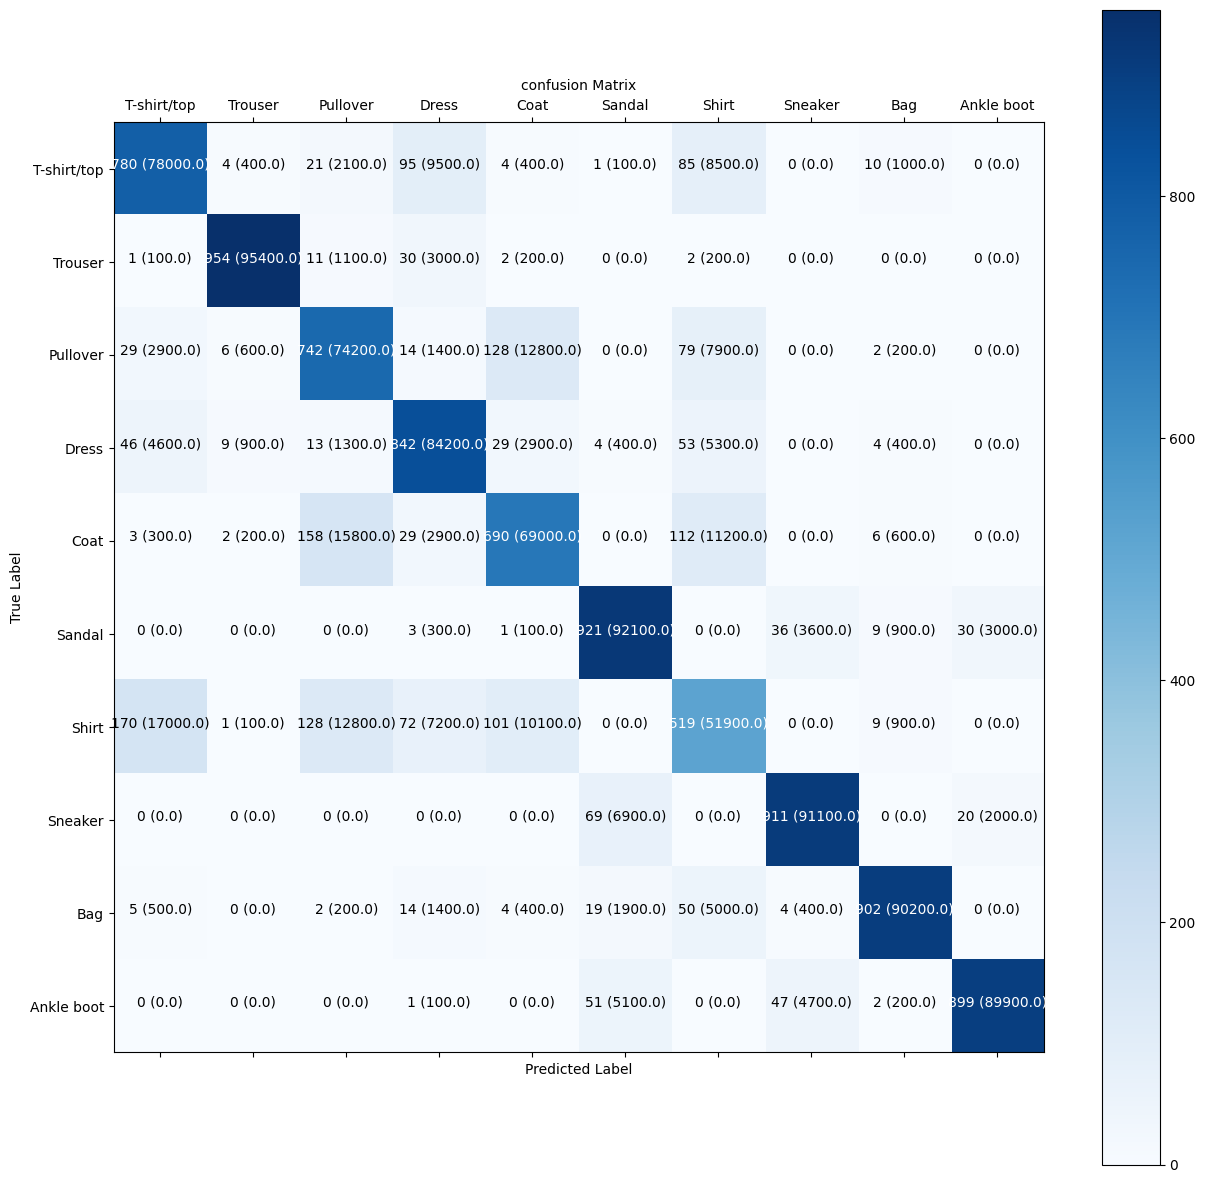

In [31]:
y_preds = y_probs.argmax(axis=1)
make_cm(test_labels, y_preds, class_names,(15,15), 10 )

In [32]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  i = random.randint(0, len(images))


  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs),
                                        true_label),
             color=color)



1/1 [==============================] - 0s 32ms/step


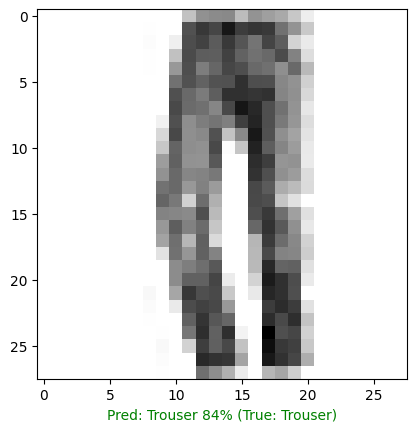

In [33]:
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

In [34]:
weights, biases = model_4.layers[1].get_weights()
weights, weights.shape

(array([[-0.27095416, -1.2674328 ,  0.45125452,  0.34739912],
        [ 0.8545899 , -0.78392285,  0.4323333 , -2.3095307 ],
        [-0.36780864,  0.7313245 , -1.113569  , -1.1912024 ],
        ...,
        [-0.7951437 ,  0.0658581 , -0.3057384 , -0.3884701 ],
        [-2.1440115 , -0.56382465,  0.28513718, -0.01736153],
        [-0.61572707,  0.92687494, -0.858204  , -0.13392463]],
       dtype=float32),
 (784, 4))

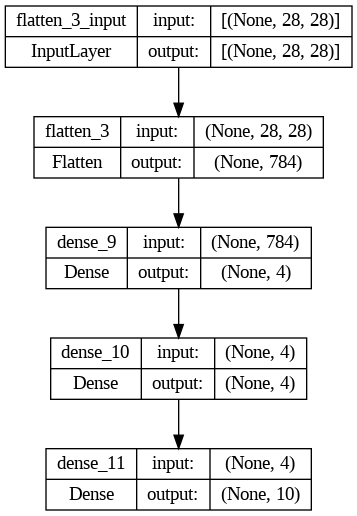

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes=True)

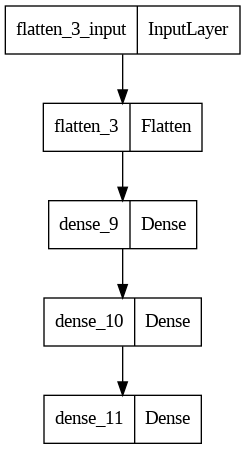

In [36]:
plot_model(model_4, to_file='model.png')

<Figure size 640x480 with 0 Axes>

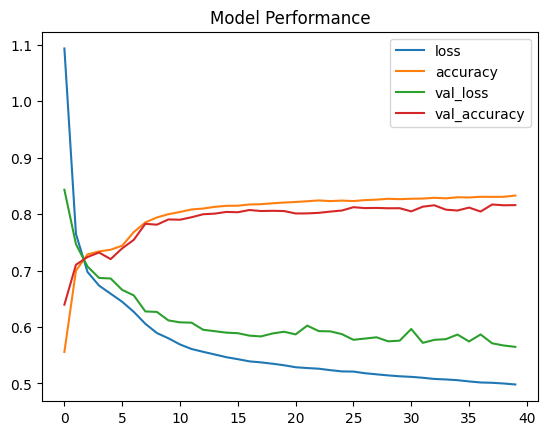

In [37]:
fig = plt.figure()
pd.DataFrame(history.history).plot(title="Model Performance").get_figure().savefig('output.png')

In [38]:
model_4.save("mnist_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download("/content/mnist_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>